<a href="https://colab.research.google.com/github/Ggipereira/samsung_course/blob/main/Chapter%203%20-%20Supervised%20Learning/Class%201%20-%20Linear%20Regression%20/Exercises/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Store Sales - Time Series Forecasting
This notebook covers exploratory data analysis (EDA) and feature engineering for the Store Sales dataset.

## Dataset Overview
- **Goal:** Predict daily store sales.
- **Features:** Date, store information, promotions, and more.
- **Target:** Sales column.

### Exercises:
- Conduct EDA to understand trends and relationships.
- Engineer meaningful features to improve forecasting accuracy.

### Dataset Link:
Download the dataset from [Kaggle Store Sales Time Series Forecasting](https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data), from the github repository or use the dataset directly from github.

## 1. Load and Explore the Data

In [4]:
#if you dont have it yet and want to download it and unzip it locally
#!wget https://github.com/samsung-ai-course/8th-9th-edition/raw/main/Chapter%203%20-%20Supervised%20Learning/Class%201%20-%20Linear%20Regression%20/Exercises/data/store-sales-time-series-forecasting.zip
# 2. Unzip the downloaded file
#!unzip store-sales-time-series-forecasting.zip -d store_sales_data

In [5]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
train = pd.read_csv("/content/store_sales_data/train.csv", parse_dates=['date'])
stores = pd.read_csv("/content/store_sales_data/stores.csv")
oil = pd.read_csv("/content/store_sales_data/oil.csv", parse_dates=['date'])
holidays = pd.read_csv("/content/store_sales_data/holidays_events.csv", parse_dates=['date'])

# Preview dataset
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [6]:
# Summary of train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


### Question 1: What is the date range of the training data? Use `.min()` and `.max()` on the `date` column.

In [7]:
# Date range
train.describe()

,id,date,store_nbr,sales,onpromotion
count,3.000888e+06,3000888,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2015-04-24 08:27:04.703088384,2.750000e+01,3.577757e+02,2.602770e+00
min,0.000000e+00,2013-01-01 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,2014-02-26 18:00:00,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2015-04-24 12:00:00,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,2016-06-19 06:00:00,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,2017-08-15 00:00:00,5.400000e+01,1.247170e+05,7.410000e+02
std,8.662819e+05,NaN,1.558579e+01,1.101998e+03,1.221888e+01


## 2. Exploratory Data Analysis

/tmp/ipython-input-640416822.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='date', y='sales', data=train, ci=None)


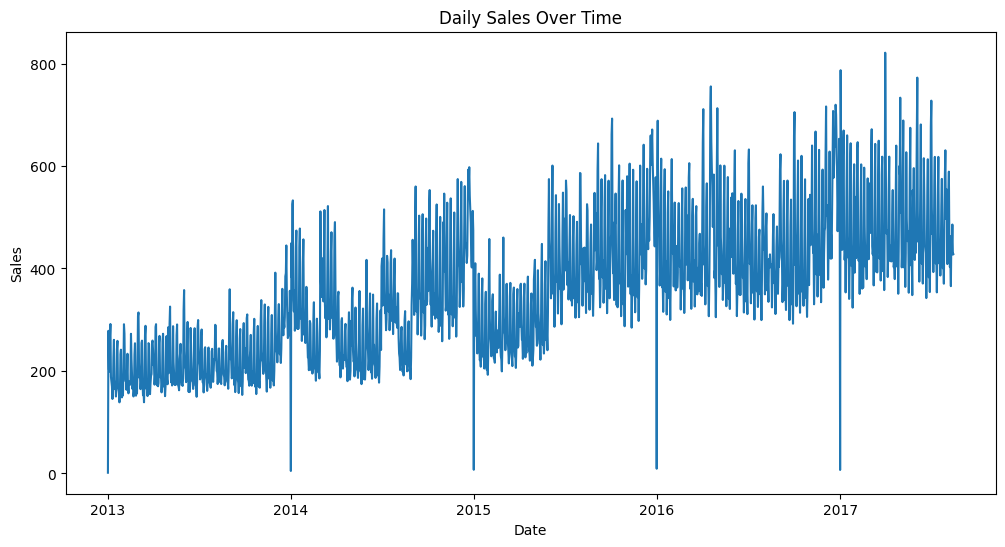

In [8]:
# Plot sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='sales', data=train, ci=None)
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

### Question 2: Are there noticeable trends or seasonality in sales data? What hypotheses can you form based on the plot?

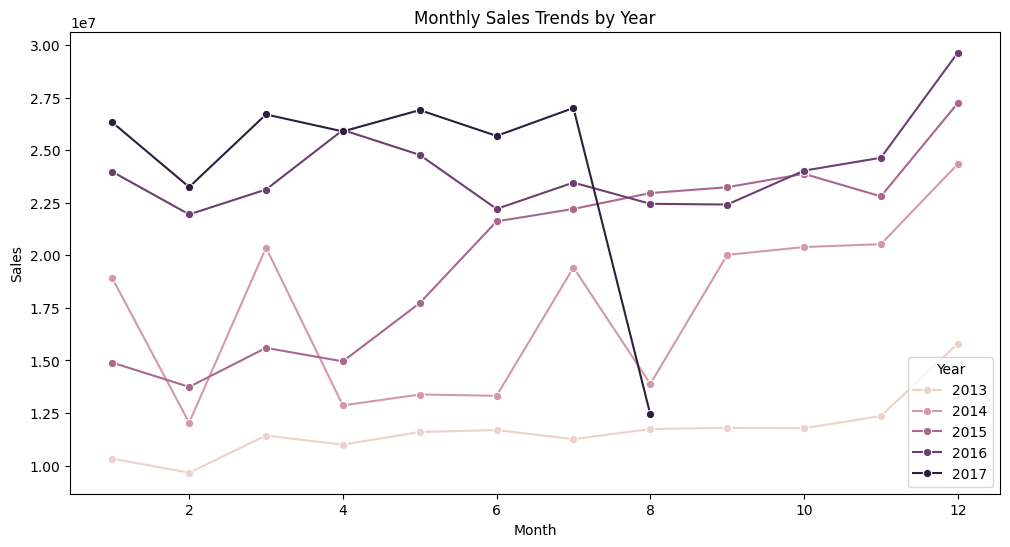

In [9]:
# Aggregate sales by year and month
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
monthly_sales = train.groupby(['year', 'month'])['sales'].sum().reset_index()

# Plot monthly sales
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='sales', hue='year', data=monthly_sales, marker='o')
plt.title('Monthly Sales Trends by Year')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(title='Year')
plt.show()

### Question 3: Which months tend to have higher or lower sales? Can this be linked to holidays or promotions?

## 3. Feature Engineering

In [10]:
# Merge train dataset with holidays and oil prices
train = train.merge(oil, on='date', how='left')
train = train.merge(holidays, on='date', how='left')
train = train.merge(stores, on='store_nbr', how='left')

# Fill missing oil prices with forward fill
train['dcoilwtico'] = train['dcoilwtico'].fillna(method='ffill')
#What is this really doing ?
# Create new features
train['day_of_week'] = pd.PeriodIndex(train['date'], freq='D').weekday
train['is_weekend'] =  train['day_of_week'].isin([5,6])
train['year_month'] = pd.PeriodIndex(train['date'], freq='M').month

# Preview engineered features
train[['date', 'sales', 'dcoilwtico', 'day_of_week', 'is_weekend']].head()

/tmp/ipython-input-931444940.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train['dcoilwtico'] = train['dcoilwtico'].fillna(method='ffill')


,date,sales,dcoilwtico,day_of_week,is_weekend
0,2013-01-01,0.0,NaN,1,False
1,2013-01-01,0.0,NaN,1,False
2,2013-01-01,0.0,NaN,1,False
3,2013-01-01,0.0,NaN,1,False
4,2013-01-01,0.0,NaN,1,False


### Question 4: How does oil price (`dcoilwtico`) correlate with sales? Plot and discuss.

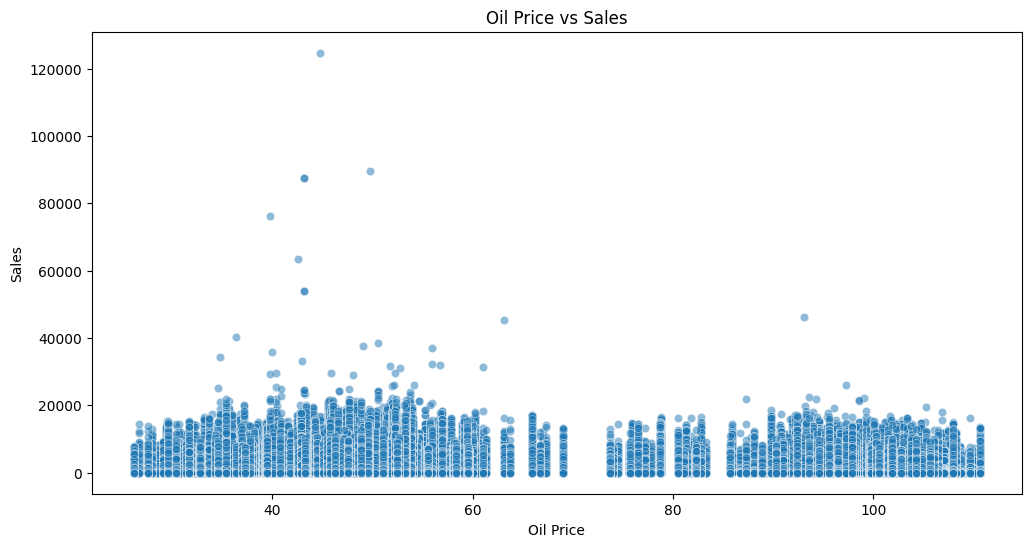

In [11]:
# Correlation between oil price and sales
plt.figure(figsize=(12, 6))
sns.scatterplot(x='dcoilwtico', y='sales', data=train, alpha=0.5)
plt.title('Oil Price vs Sales')
plt.xlabel('Oil Price')
plt.ylabel('Sales')
plt.show()

In [12]:
train

,id,date,store_nbr,family,sales,onpromotion,year,month,dcoilwtico,type_x,...,locale_name,description,transferred,city,state,type_y,cluster,day_of_week,is_weekend,year_month
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,2013,1,NaN,Holiday,...,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,1,False,1
1,1,2013-01-01,1,BABY CARE,0.000,0,2013,1,NaN,Holiday,...,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,1,False,1
2,2,2013-01-01,1,BEAUTY,0.000,0,2013,1,NaN,Holiday,...,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,1,False,1
3,3,2013-01-01,1,BEVERAGES,0.000,0,2013,1,NaN,Holiday,...,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,1,False,1
4,4,2013-01-01,1,BOOKS,0.000,0,2013,1,NaN,Holiday,...,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,1,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,2017,8,47.57,Holiday,...,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6,1,False,8
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,2017,8,47.57,Holiday,...,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6,1,False,8
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,2017,8,47.57,Holiday,...,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6,1,False,8
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,2017,8,47.57,Holiday,...,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6,1,False,8


### 4. Training Season

Based on all the EDA and feature engineer done prior train a simple linear regression

In [13]:
# prompt: ### 4. Training Season
# Based on all the EDA and feature engineer done prior train a simple linear regression
# import only the necessary and do incompete code

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Select features and target variable
features = ['dcoilwtico',]
target = 'sales'

# Handle missing values (if any) -  replace with more robust imputation if necessary
train.dropna(subset=['dcoilwtico'], inplace=True)

# Split data into training and testing sets
X = train[features]
y = train[target]

#Question: In this dataset train and test are already separated. Why would we split it again ? Is there a reason ? Is this correct?
#P.s this is a time-series
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1230667.297018091


In [14]:
!pip install category_encoders


In [1]:
import category_encoders as ce

ohe = ce.OneHotEncoder(cols=['dcoilwtico'])
X_train = ohe.fit_transform(X_train)
X_train = ohe.transform(X_train)

NameError: name 'X_train' is not defined

## 5. Extra Questions
1. Create a lag feature for sales (e.g., `sales_lag_1` for the previous day). How does this improve your understanding of the data?
2. Engineer a feature indicating the number of holidays in the past 7 days. Does it help explain sales trends?
3. Use one or both of these new features, do they impact the predictions?
4. Split the data into training and validation sets for future modeling. How would you ensure no data leakage in a time-series setup? (We will talk about this next, but think about it)

In [ ]:
#Have fun ;)